# Audio Processing (Optional)

Objective: Develop a program capable of reading and playing a musical score. Here we will use the musical score of the Ode to Joy:

In [77]:
ode_to_joy_notes = [
"la", "la", "sib", "do", "do", "sib", "la", "sol", 
"fa", "fa", "sol", "la", "la", "sol", "sol",
"la", "la", "sib", "do", "do", "sib", "la", "sol",
"fa", "fa", "sol", "la", "sol", "fa", "fa",
"sol", "sol", "la", 
"fa", "sol", "la", "sib", "la",
"fa", "sol", "la", "sib", "la", 
"sol", "fa", "sol", "do",
"la", "la", "sib", "do", "do", "sib", "la", "sol",
"fa", "fa", "sol", "la", "sol", "fa", "fa"]

source: [Ode to de Joy](https://www.apprendrelaflute.com/lecon-6-ode-a-la-joie)

### Imports

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft
from scipy.io import wavfile
from IPython.display import Audio

### matchings table
__source__ : [Wikipedia](https://fr.wikipedia.org/wiki/Note_de_musique)
__Note__: For best results, use the top octave for do (523.25 instead of 261.63)

In [79]:
frequencies = {
  "do": 523.25,
  "re": 293.66,
  "mi": 329.63,
  "fa": 349.23,
  "sol": 392.00,
  "la": 440.00,
  "si": 493.88,
  "dod": 277.18,
  "reb": 277.18,
  "red": 311.13,
  "mib": 311.13,
  "fad": 369.99,
  "solb": 369.99,
  "sold": 415.30,
  "lab": 415.30,
  "lad": 466.16,
  "sib": 466.16,
  }

### Recovery of previous methods (a little adapted)

In [80]:
R = 44100
D = 0.5

In [81]:
def create_sound(f):
    x = np.linspace(0, D, int(D * R))
    y = np.cos( 2 * np.pi * f * x)
    return y

In [82]:
def plot_fft(signal, rate, freq_min, freq_max):
    Y = np.abs(fft.fft(signal))
    X = np.abs(fft.fftfreq(Y.size) * rate)
    plt.xlim(freq_min, freq_max)
    plt.plot(X, Y)

## List of sounds from the musical score
### Pseudo Code:
- Initialize a song list
- Iterate on Ode to Joy notes
- For each note rebuild the sound
- Add this sound to my song list
- Play the song list
- Plot the fft graph

In [83]:
def create_song(notes):
    songs = np.array([])
    for note in notes:
        new_song = create_sound(frequencies[note])
        songs = np.concatenate((songs, new_song), axis=None)
    return songs

In [84]:
ode_to_joy_song = create_song(ode_to_joy_notes)

### Listen to the song

In [85]:
Audio(ode_to_joy_song, rate=R)

### View the fft

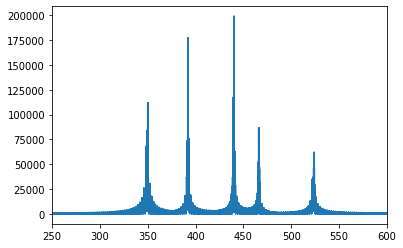

In [86]:
plot_fft(ode_to_joy_song, R, 250, 600)